# Introduction
1. [Import Library](#1)
1. [Load and Check Data](#2)
1. [Missing Value](#3)
1. [Exploratory Data Science](#4)
1. [Feature Engineering](#5)
1. [Split - Standardization](#6)
1. [Linear Regression](#7)
1. [Regularization](#8)
    * [Ridge Regression](#9)
    * [Lasso Regression](#10)
    * [ElasticNet Regression](#11)
1. [Averaging Models](#12)


<a id = "1"></a><br>
## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

<a id = "2"></a><br>
## Load and Check Data

In [2]:
column_name = ["MPG", "Cylinders","Displacement", "Horsepower","Weight","Acceleration","Model Year", "Origin"]
data = pd.read_csv("auto-mpg.data", names = column_name, na_values="?",comment="\t",sep=" ", skipinitialspace=True)
data = data.rename(columns = {"MPG":"target"})

In [3]:
print(data.head())
print("Data shape:", data.shape)

data.info()

   target  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
Data shape: (398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float

In [4]:
describe = data.describe()

<a id = "3"></a><br>
## Missing Value

In [5]:
print(data.isna().sum())
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


<Axes: xlabel='Horsepower', ylabel='Density'>

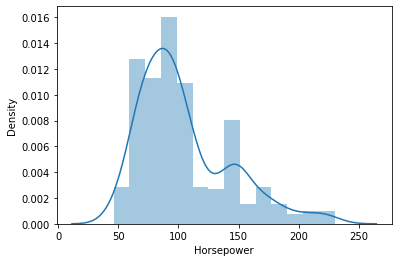

In [6]:
print(data.isna().sum())
sns.distplot(data.Horsepower)

<a id = "4"></a><br>
## Exploratory Data Science

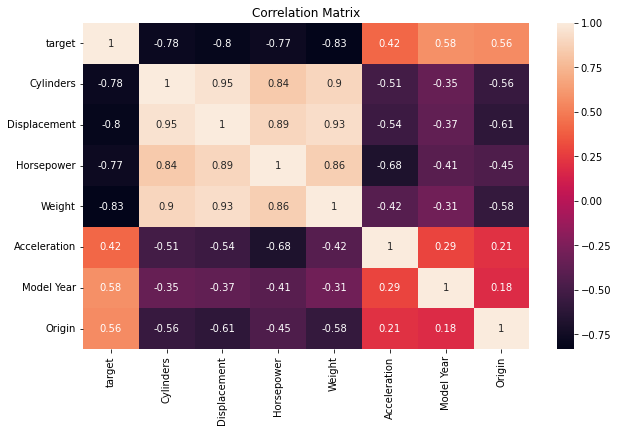

In [7]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


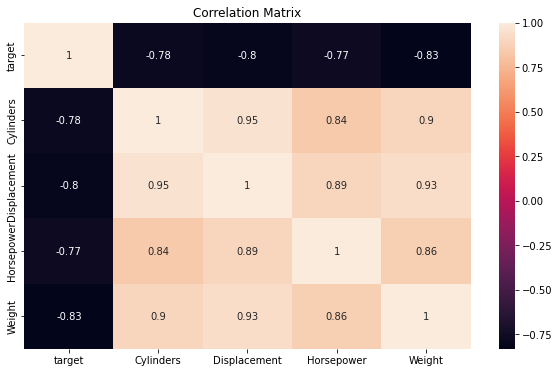

In [8]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure(figsize=(10, 6))
sns.heatmap(data[corr_features].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

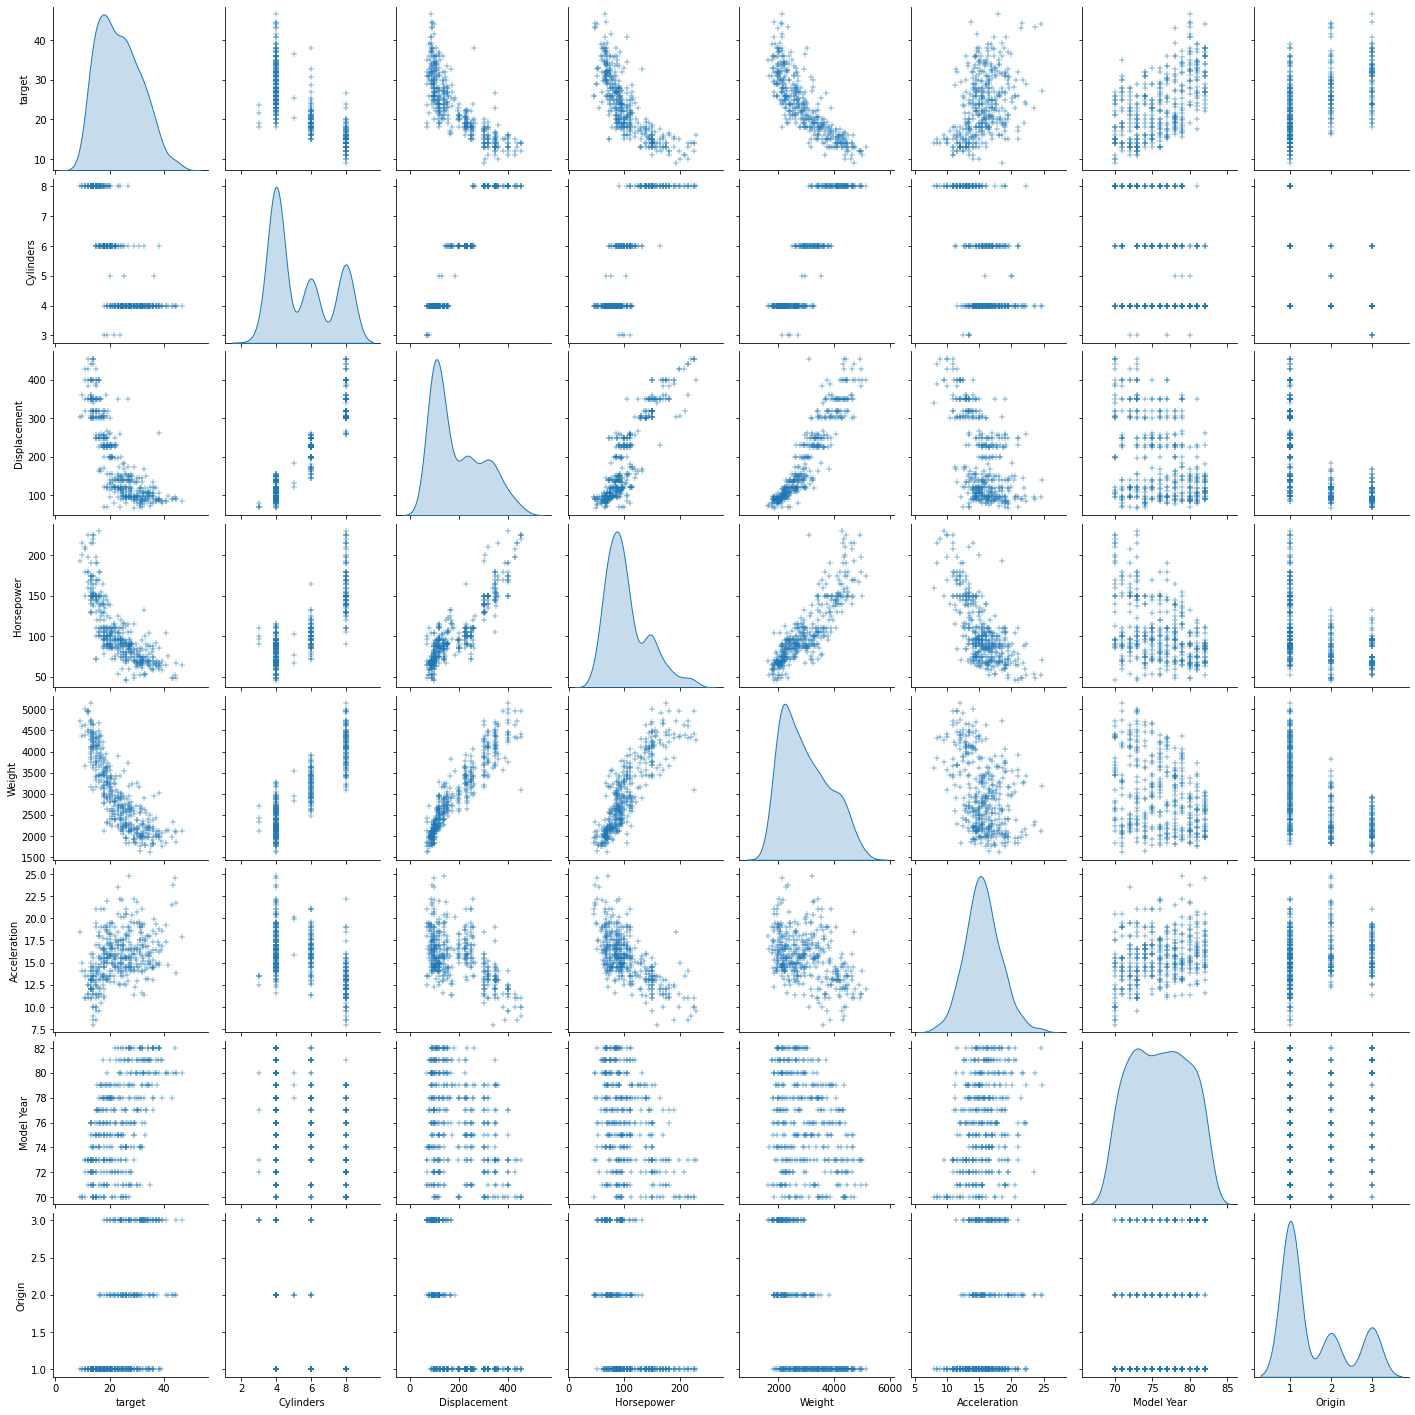

In [9]:
sns.pairplot(data, diag_kind="kde", markers = "+")
plt.show()

cylinders and origin can be categorical.

Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


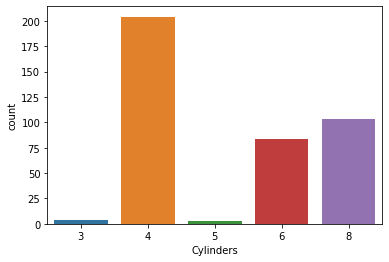

In [10]:
plt.figure()
sns.countplot(x="Cylinders", data=data)
print(data["Cylinders"].value_counts())

Origin
1    249
3     79
2     70
Name: count, dtype: int64


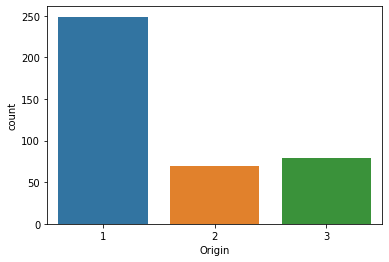

In [11]:
plt.figure()
sns.countplot(x="Origin", data=data)
print(data["Origin"].value_counts())

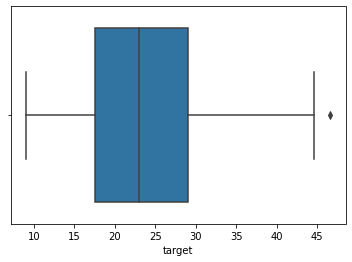

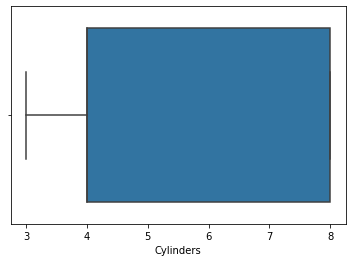

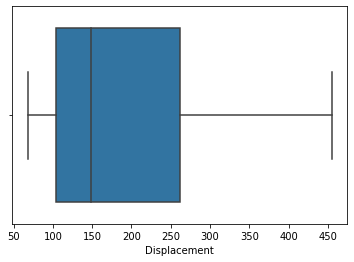

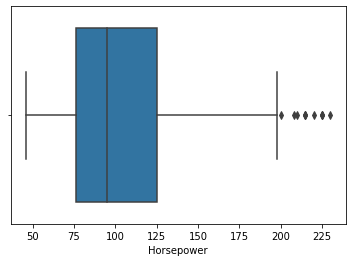

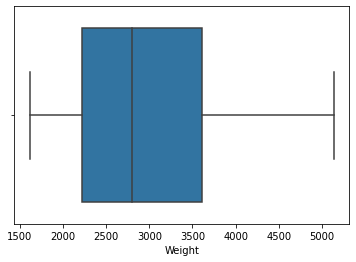

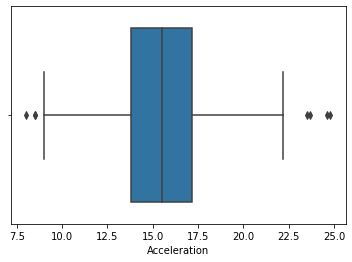

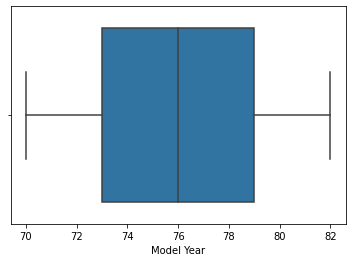

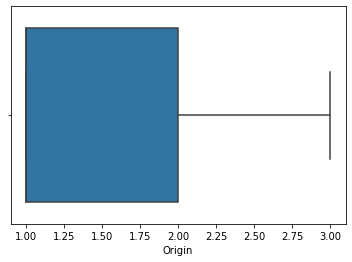

In [12]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [13]:
thr = 2
horsepower_desc = describe["Horsepower"]

In [14]:
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < top_limit_hp
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

In [15]:
data = data[filter_hp]

In [16]:
thr = 2
acceleration_desc = describe["Acceleration"]

In [17]:
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < top_limit_acc
filter_acc_top = data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

In [18]:
data = data[filter_acc]

<a id = "5"></a><br>
## Feature Engineering

mu: 23.472405063291134, sigma = 7.756119546409932


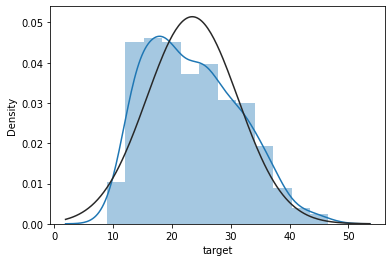

In [20]:
sns.distplot(data.target, fit = norm)
(mu,sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu,sigma))

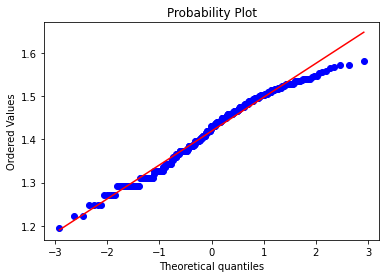

In [24]:
fig = plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

mu: 1.4191898273638643, sigma = 0.0786183794467485


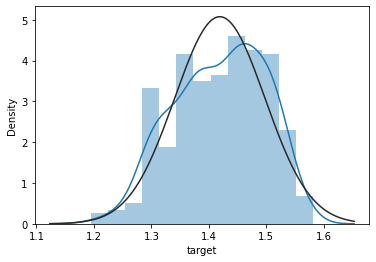

In [23]:
data["target"] = np.log1p(data["target"])

plt.figure()
sns.distplot(data.target, fit = norm)

(mu,sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu,sigma))

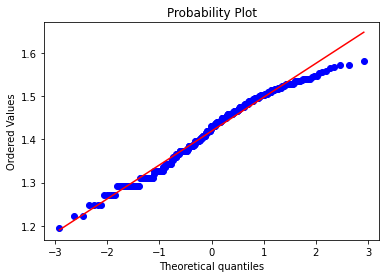

In [25]:
fig = plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

In [27]:
skeweed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skeweed_feats, columns = ["skewed"])

In [28]:
data["Cylinders"] = data["Cylinders"].astype(str)
data["Origin"] = data["Origin"].astype(str)
data = pd.get_dummies(data)


<a id = "6"></a><br>
## Split - Standardization

In [29]:
x = data.drop(["target"], axis = 1)
y = data.target

In [30]:
test_size = 0.9
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


<a id = "7"></a><br>
## Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("LR Coef:",lr.coef_)
y_predicted_dummy = lr.predict(x_test)
mse = mean_squared_error(y_test,y_predicted_dummy)
print("Linear Regression MSE: ",mse)


LR Coef: [-2.52481103e-02 -2.58664178e-02 -3.46486909e-03 -1.22340928e-02
  1.00453285e-02 -1.33915765e-02  1.19852165e-02 -6.07153217e-18
 -2.87282547e-03 -7.11804390e-03 -1.42257169e-03 -6.41951075e-03
  7.82669874e-03]
Linear Regression MSE:  0.0012023301858505267


<a id = "8"></a><br>
## Regularization

<a id = "9"></a><br>
### Ridge Regression

In [35]:
ridge = Ridge(random_state=42, max_iter= 10000)
alphas = np.logspace(-4,-0.5,30)
tuned_param = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_param, cv = n_folds, scoring="neg_mean_squared_error", refit = True)
clf.fit(x_train, y_train)

score = clf.cv_results_["mean_test_score"]
scored_std = clf.cv_results_["std_test_score"]
print("Ridge Coef:", clf.best_estimator_.coef_)

ridge = clf.best_estimator_
print("Ridge Best Estimator:", ridge)

y_predicted_dummy = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("Ridge MSE:",mse)
print("------------------------------------------------")

Ridge Coef: [-0.01988576 -0.02382489 -0.00758326 -0.01124159  0.01050204 -0.01244543
  0.01291161  0.         -0.00298165 -0.00866841 -0.00177709 -0.00596186
  0.00780533]
Ridge Best Estimator: Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE: 0.0011432599290536092
------------------------------------------------


Text(0.5, 1.0, 'ridge')

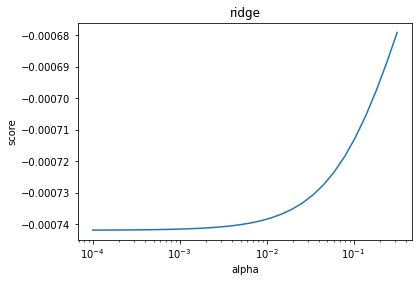

In [36]:
plt.figure()
plt.semilogx(alphas,score)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("ridge")

<a id = "10"></a><br>
### Lasso Regression

In [37]:
lasso = Lasso(random_state=42, max_iter= 10000)
alphas = np.logspace(-4,-0.5,30)
tuned_param = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_param, cv = n_folds, scoring="neg_mean_squared_error", refit = True)
clf.fit(x_train, y_train)

score = clf.cv_results_["mean_test_score"]
scored_std = clf.cv_results_["std_test_score"]
print("Lasso Coef:", clf.best_estimator_.coef_)

lasso = clf.best_estimator_
print("Lasso Best Estimator:", ridge)

y_predicted_dummy = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("Lasso MSE:",mse)
print("------------------------------------------------")

Lasso Coef: [-0.01861069 -0.02398441 -0.00797256 -0.00986849  0.01065839 -0.01032769
  0.01619238  0.          0.         -0.00541232 -0.         -0.00337664
  0.00923181]
Lasso Best Estimator: Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Lasso MSE: 0.0011134901415308471
------------------------------------------------


Text(0.5, 1.0, 'Lasso')

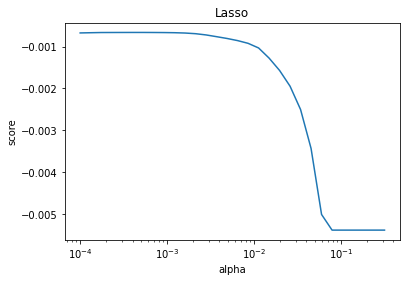

In [38]:
plt.figure()
plt.semilogx(alphas,score)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

<a id = "11"></a><br>
### ElasticNet

In [39]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0,1.0,0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring="neg_mean_squared_error", refit = True)
clf.fit(x_train, y_train)

print("ElasticNet Coef: ", clf.best_estimator_.coef_)

eNet = clf.best_estimator_

print("ElasticNet Best Estimator: ",eNet)

y_predicted_dummy = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("ElasticNet MSE:",mse)
print("------------------------------------------------")

ElasticNet Coef:  [-0.0123829  -0.01741951 -0.01433945 -0.00660099  0.01082416 -0.00967272
  0.0132682   0.         -0.0030826  -0.01025134 -0.00266395 -0.00432416
  0.00727956]
ElasticNet Best Estimator:  ElasticNet(alpha=0.1373823795883264, l1_ratio=0.0, max_iter=10000,
           random_state=42)
ElasticNet MSE: 0.0010229421793035004
------------------------------------------------


<a id = "12"></a><br>
## Averaging Models

In [40]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    def fit(self,x,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(x,y)
            
        return self
    
def predict(self, x):
    predictions = np.column_stack([model.predict(x) for model in self.models_])
    return np.mean(predictions, axis=1)

In [41]:
averaged_models = AveragingModels(models = (ridge, lasso))
averaged_models.fit(x_train, y_train)

y_predicted_dummy = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_dummy)
print("Averaged Models MSE:",mse)
print("------------------------------------------------")

Averaged Models MSE: 0.0010229421793035004
------------------------------------------------
